In [112]:
# Install tensor flow 2.7 required 
!pip install tensorflow==2.7
import os
from pickle import dump
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="adc.json"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [114]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model


In [115]:


data_path= '/content/drive/MyDrive/Digital_Alpha'
output_dir =  '/content/drive/MyDrive/Digital_Alpha'

Reading the training and test data for our problem

In [130]:

training_data_df = pd.read_csv(data_path + '/data.csv')



In [131]:
training_data_df.fyear.value_counts()

1999    6828
1997    6789
2000    6752
1996    6745
1998    6716
2001    6362
1995    6230
2002    6067
2003    5981
2004    5934
2006    5908
2007    5868
2005    5863
1994    5684
2013    5647
2012    5630
2014    5627
2008    5612
2011    5404
2010    5389
1993    5377
2009    5367
1992    4970
1991    4713
1990    4582
Name: fyear, dtype: int64

In [132]:
req_fyear=[2011,2012,2014,2013]
training_data_df=training_data_df.loc[training_data_df['fyear'].isin(req_fyear)]
training_data_df=training_data_df.reset_index(drop=True)
training_data_df.shape

(22308, 51)

In [133]:
training_data_df.head()

,fyear,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,misstate,act,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,2011,1004,5080.0,0,0,0,NaN,NaN,0,1063.272,...,0.761467,0.191150,0.545102,-0.008841,1,1.781717,0.829860,0.221612,0.059652,-0.013265
1,2011,1045,4512.0,0,0,0,NaN,NaN,0,6757.000,...,0.201401,0.074685,-0.161686,-0.062237,1,-7.034304,0.964431,-0.484317,-0.048348,0.072462
2,2011,1050,3564.0,0,0,0,NaN,NaN,0,53.470,...,0.768416,0.038334,0.511236,0.079692,1,0.533614,1.159873,-0.013221,0.161573,0.082732
3,2011,1072,3670.0,0,0,0,NaN,NaN,0,1727.145,...,0.574595,-0.036759,-0.016286,-0.047812,1,0.943014,1.015906,0.752631,0.073181,-0.066825
4,2011,1075,4911.0,0,0,0,NaN,NaN,0,956.470,...,0.250610,0.001342,0.003850,-0.002312,1,0.726108,1.011341,0.105432,0.058353,-0.019614


In [134]:
training_data_df.columns

Index(['fyear', 'gvkey', 'sich', 'insbnk', 'understatement', 'option',
       'p_aaer', 'new_p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype='object')

In [135]:
scalar = MinMaxScaler(feature_range=(0,1))
X=training_data_df.drop('misstate' ,axis=1)
scaled_training = scalar.fit_transform(X)
print(scaled_training.shape)

# scaled_test = scalar.fit_transform(test_data_df)

scaled_training_df = pd.DataFrame(data = scaled_training, columns=X.columns)
scaled_training_df=pd.concat([scaled_training_df,training_data_df['misstate']],axis=1)

dump(scalar, open('scaler.pkl', 'wb'))
# scaled_test_df = pd.DataFrame(data = scaled_test, columns=training_data_df.columns)

(22308, 50)


In [136]:
np.sum(training_data_df['misstate']==1)

55

In [137]:
scaled_training_df.shape

(22308, 51)

let us have a look on scaled data 

In [138]:
scaled_training_df=scaled_training_df.drop(columns=['p_aaer','new_p_aaer'])
scaled_training_df=scaled_training_df.dropna()
scaled_training_df.head()

,fyear,gvkey,sich,insbnk,understatement,option,act,ap,at,ceq,...,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf,misstate
0,0.0,0.000000,0.503183,0.0,0.0,0.0,0.006966,0.005047,0.005354,0.045424,...,0.415025,0.527644,0.504897,1.0,0.736401,0.174557,0.993731,0.935117,0.421352,0
1,0.0,0.000130,0.445792,0.0,0.0,0.0,0.044271,0.025236,0.058155,0.018575,...,0.407784,0.506815,0.488683,1.0,0.000000,0.209199,0.985869,0.920845,0.433525,0
2,0.0,0.000145,0.350005,0.0,0.0,0.0,0.000350,0.000206,0.000193,0.042658,...,0.405524,0.526646,0.531781,1.0,0.632147,0.259509,0.991116,0.948587,0.434984,0
3,0.0,0.000215,0.360715,0.0,0.0,0.0,0.011316,0.002601,0.006018,0.049652,...,0.400855,0.511100,0.493063,1.0,0.666345,0.222449,0.999644,0.936905,0.413747,0
4,0.0,0.000224,0.486107,0.0,0.0,0.0,0.006267,0.008195,0.031972,0.055378,...,0.403224,0.511693,0.506880,1.0,0.648226,0.221274,0.992437,0.934946,0.420451,0


In [181]:
X = scaled_training_df.drop('misstate', axis=1).values
# X = scaled_training_df.drop(columns=['misstate','fyear'], axis=1).values
Y = scaled_training_df['misstate'].values

In [214]:
def save_model(estimator, gcspath, name):
  import joblib
  import os, subprocess, datetime
  model = 'model.joblib'
  joblib.dump(estimator, model)
  model_path = os.path.join(gcspath, datetime.datetime.now().strftime(
    'export_%Y%m%d_%H%M%S'), model)
  subprocess.check_call(['gsutil', 'cp', model, model_path])
  return model_path

**Random Forest**

At split  1
After Smote the shape of sample is =  (2640, 48)
Number of fraud ==1 sample is =  240
ROC Score is =  0.5822318166722019
At split  2
After Smote the shape of sample is =  (2640, 48)
Number of fraud ==1 sample is =  240


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ROC Score is =  0.5302391232148788
At split  3
After Smote the shape of sample is =  (2640, 48)
Number of fraud ==1 sample is =  240


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ROC Score is =  0.597509133178346
At split  4
After Smote the shape of sample is =  (2640, 48)
Number of fraud ==1 sample is =  240


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ROC Score is =  0.5471770176021256
At split  5
After Smote the shape of sample is =  (2640, 48)
Number of fraud ==1 sample is =  240


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ROC Score is =  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


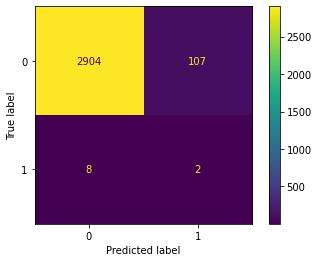

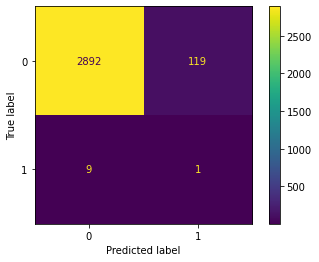

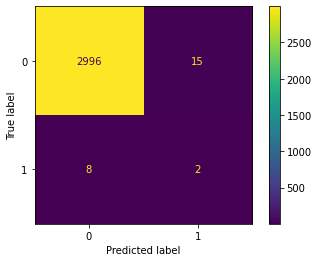

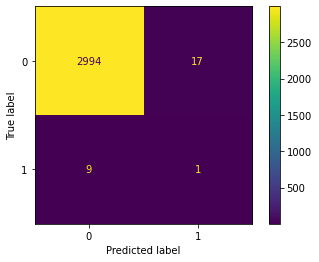

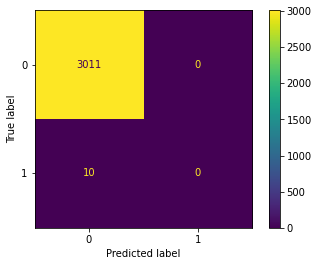

In [232]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, Y)
i=1
dict_model_saves={}
StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skf.split(X, Y):
  print("At split ",i)
  MODEL_DIR='gs://digital-alpha-tf2-models-random/random_forest_'+str(i)+'/'
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  over = SMOTE(sampling_strategy=0.02)
  under = RandomUnderSampler(sampling_strategy=0.1)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X_train, y_train = pipeline.fit_resample(X_train, y_train)
  print("After Smote the shape of sample is = ",X_train.shape)
  print("Number of fraud ==1 sample is = ",np.sum(y_train==1))
  classifier = XGBClassifier(objective='binary:logistic',n_estimators=100, class_weight='balanced',n_jobs=-1,random_state=42)
  classifier.fit(X_train,y_train)
  # saved = save_model(classifier, MODEL_DIR,'random_forest_'+str(i))
  # dict_model_saves["model_"+str(i)]=saved
  i+=1
  print("ROC Score is = ",roc_auc_score(y_test, classifier.predict(X_test)))
  plot_confusion_matrix(classifier, X_test, y_test)  



In [227]:
dict_model_saves

{'model_2': 'gs://digital-alpha-tf2-models-random/random_forest_1/export_20220312_125558/model.joblib',
 'model_3': 'gs://digital-alpha-tf2-models-random/random_forest_2/export_20220312_125601/model.joblib',
 'model_4': 'gs://digital-alpha-tf2-models-random/random_forest_3/export_20220312_125604/model.joblib',
 'model_5': 'gs://digital-alpha-tf2-models-random/random_forest_4/export_20220312_125607/model.joblib',
 'model_6': 'gs://digital-alpha-tf2-models-random/random_forest_5/export_20220312_125610/model.joblib'}

In [210]:

saved='gs://digital-alpha-tf2-models-random/random_forest/export_20220304_112553/model.joblib'

In [ ]:
saved = save_model(classifier, MODEL_DIR,'random_forest')


In [ ]:
print(saved)

gs://digital-alpha-tf2-models-random/random_forest/export_20220304_112553/model.joblib


In [ ]:
MODEL = 'fraud_prediction_random'
!gcloud ai-platform models create $MODEL --regions=us-central1

Using endpoint [https://ml.googleapis.com/]
Created ai platform model [projects/digital-alpha/models/fraud_prediction_random].


In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [15]:

# import pickle
# filename = 'random_forest.sav'
# pickle.dump(classifier, open(filename, 'wb'))

NameError: ignored

**FCNN**

In [ ]:


model = Sequential()


model.add(Dense(50, input_dim=48, activation = 'relu'))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(50, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')



In [ ]:
X.shape

(116478, 48)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2450      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X_test = scaled_test_df.drop('total_earnings', axis=1).values
# Y_test = scaled_test_df['total_earnings'].values

In [ ]:
# Setup for tensorboard
from datetime import datetime
logdir="logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
training_history = model.fit(X, Y,
                             epochs = 5,
                             shuffle=True,
                             verbose=0,
                             callbacks=[tensorboard_callback])

print("Average test loss: ", np.average(training_history.history['loss']))


In [ ]:
test_error_rate = model.evaluate(X,
                                 Y,
                                 verbose=0)
print('The mean squared error for test data is {}'.format(test_error_rate))

The mean squared error for test data is 0.03634587302803993


In [ ]:
# Read the values of features for new product and test on our traioned model 
# df_new_products = pd.read_csv(data_path + 'proposed_new_product.csv').values

In [ ]:
# # Use our trained moel to predict
# predictions = model.predict(df_new_products)

In [ ]:
# # Scaling up the earnings prediction using our Normalisation Parameters
# predictions = predictions + 0.1159
# predictions = predictions/0.0000036968

# print('Earnings predictions for Proposed product - ${}'.format(predictions))

In [ ]:


model.save('trained_model.h5')

print('Trained Model saved at {}'.format(output_dir))

Trained Model saved at /content/drive/MyDrive/Digital_Alpha


In [ ]:
# Importing saved model

model_trained = load_model('trained_model.h5')

In [ ]:
# # Read the values of features for new product and test on our traioned model 
# df_new_products = pd.read_csv(data_path + 'proposed_new_product.csv').values

In [ ]:
# predictions = model_trained.predict(df_new_products)
# predictions = predictions + 0.1159
# predictions = predictions/0.0000036968

# print('Earnings predictions for Proposed product - ${}'.format(predictions))

**Saving Cloud Model**

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#'-tf2-models-random'

In [47]:
def save_model(bucket_name,model_name,model):

  # GCP project name
  CLOUD_PROJECT = 'digital-alpha'
  BUCKET = 'gs://' + CLOUD_PROJECT + bucket_name

  # Set the gcloud consol to $CLOUD_PROJECT 9Environment Variable for your Desired Project)
  !gcloud config set project $CLOUD_PROJECT

  # Create the storage bucket for tf2 Models
  !gsutil mb $BUCKET
  print(BUCKET)

  MODEL = model_name
  MODEL_DIR = BUCKET + '/'+model_name

  model.save(BUCKET + f'/{MODEL}', save_format='')

  print(BUCKET + f'/{MODEL}')
  print(MODEL_DIR)

  !gcloud ai-platform models create $MODEL --regions=us-central1



In [ ]:
save_model('-tf2-models','fraud_prediction',model)
model_name='fraud_prediction'

In [ ]:
VERSION = 'v1'


**Prediction**

In [20]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):

    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [22]:
len(X[0].shape)

1

In [23]:
CLOUD_PROJECT

'digital-alpha'

In [43]:
tst=X[0:101]

In [44]:
tst.shape

(101, 48)

In [45]:
test_predictions = predict_json(CLOUD_PROJECT, 'fraud_prediction_random',tst.tolist())

In [ ]:
test_predictions

In [ ]:
# !gcloud ai-platform versions create $VERSION \
#   --model $MODEL \
#   --origin $MODEL_DIR \
#   --runtime-version=2.7 \
#   --framework='tensorflow' \
#   --python-version=3.7

ERROR: (gcloud.ai-platform.versions.create) argument --model: Must be specified.
Usage: gcloud ai-platform versions create VERSION --model=MODEL [optional flags]
  optional flags may be  --accelerator | --async | --config | --description |
                         --framework | --help | --labels | --machine-type |
                         --max-nodes | --metric-targets | --min-nodes |
                         --origin | --python-version | --region |
                         --runtime-version | --staging-bucket

For detailed information on this command and its flags, run:
  gcloud ai-platform versions create --help


In [ ]:
model_list=[]
def predict_ensemble(model_list,X):
  dict_results={}
  for model in model_list:
    test_predictions = predict_json(CLOUD_PROJECT, model,X.tolist())
    y=[]
    for dic in test_predictions:
        for key in list(dic.keys()):
            y.append(dic[key][0])
    dict_results[model]=y
  
  preds=[]
  for i in range(len(dict_results[model_list[0]])):
    val=0
    for j in model_list:
      if dict_results[j][i]==1:
        val=1
        break
    preds.append(val)
  return preds

